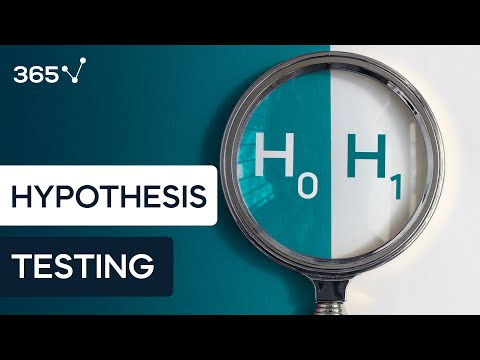

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

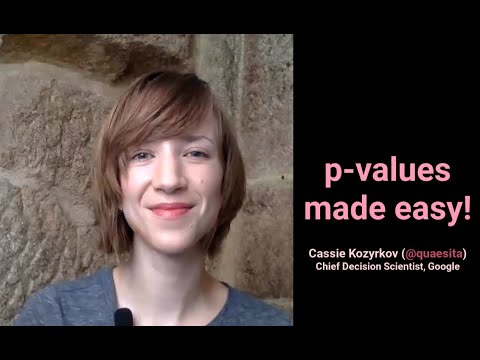

In [2]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

Q1
    The key factor that makes the difference between ideas that can and cannot be examined and tested statistically is that whether there is available data. If there is no data, there cannot be any test thus there cannot be any hypothesis.
    I would say that a good null hypothesis has a good testibility, since hypotheses are rejected or failed to be rejected after having tests, and if the test cannot be clear enough, there simply would be no conclusion.
    The difference between a null hypothesis and an alternative hypothesis is that a null hypothesis is assumed to be true in the beginning, whereas alternative hypothesis would be accepted if the p value is low meaning that the null hypothesis is not probable.

Q2
    It means that in order to get conclusions form tests, the value of a random sample (xi) and the sample mean (x bar) would not have any effect since population means (mu) and hypothesized population means (mu0) are actually used for doing the tests. In other words, the outcome of tests refer to the statistic about the whole population, instead of some of the specific values and the statistic about them.

Q3
    When the null hypothesis is assumed to be true, every thing comes to the p value, and p value is calculated with the sampling distribution in the world where the null hypothesis is true.

Q4 
    If the observed test statistic and the sampling distribution are similar, then the null hypothesis is highly probable, and the p value is high in this case.

Q5
    

In [16]:
import numpy as np
import scipy.stats as stats

# Set parameters
n_flips = 124  # Number of coin flips
true_proportion = 0.645  # Expected proportion for a fair coin

# Simulate coin flips (1 for heads, 0 for tails)
np.random.seed(0)  # For reproducibility
flips = np.random.binomial(1, true_proportion, n_flips)

# Calculate observed proportion of heads
observed_proportion = np.mean(flips)

# Calculate test statistic (z-score)
p_null = 0.5  # Null hypothesis proportion
std_error = np.sqrt(p_null * (1 - p_null) / n_flips)
z_score = (observed_proportion - p_null) / std_error

# Calculate p-value (two-tailed)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Output results
print(f"Observed Proportion of Heads: {observed_proportion:.2f}")
print(f"P-Value: {p_value:.4f}")# p =0.0012 so very 
#strong evidence against the null hypothesis


Observed Proportion of Heads: 0.65
P-Value: 0.0012


Q6
    As the video said, there exsists uncertainties in real life, so a smaller p value couldn't definitively prove that the null hypothesis is false using p value, meaning that it is not possible to definitively prove that Fido is guilty. But it is possible to prove that Fido is innocent if the p value approaches 1.

Q7

In [29]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
import pandas as pd

patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})
patient_data

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


In [22]:

# First let's format this data in the manner of last week's HW "Prelecture" video
# from IPython.display import YouTubeVideo
# YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)  # https://www.youtube.com/watch?v=Xz0x-8-cgaQ

patient_data['HealthScoreChange'] = patient_data.FinalHealthScore-patient_data.InitialHealthScore
# why do we do the subtraction in this order?
patient_data

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,HealthScoreChange
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3
5,6,41,F,80,86,6
6,7,33,M,79,86,7
7,8,48,F,85,82,-3
8,9,26,M,76,83,7
9,10,39,F,83,84,1


In [24]:
# Do you get the idea here?
# Can you see what's chaning in the output below??

print(pd.DataFrame({'HealthScoreChange': patient_data['HealthScoreChange'],
                    '> 0 ?': patient_data['HealthScoreChange']>0}))

random_difference_sign = np.random.choice([-1, 1], size=len(patient_data))
pd.DataFrame({'HealthScoreChange': random_difference_sign*patient_data['HealthScoreChange'].abs(),
              '> 0 ?': (random_difference_sign*patient_data['HealthScoreChange'])>0})

   HealthScoreChange  > 0 ?
0                  2   True
1                  8   True
2                 -3  False
3                  5   True
4                  3   True
5                  6   True
6                  7   True
7                 -3  False
8                  7   True
9                  1   True


,HealthScoreChange,> 0 ?
0,2,True
1,8,True
2,3,False
3,5,True
4,-3,False
5,-6,False
6,7,True
7,-3,True
8,-7,False
9,-1,False


In [26]:
# And then can you see what's happening here???

np.random.seed(1)  # make simulation reproducible
number_of_simulations = 10000  # experiment with this... what does this do?
n_size = len(patient_data)  # 10
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# generate "random improvement" proportions assuming H0 (vaccine has no average effect) is true 
# meaning that the "before and after" differences are positive or negative at "random"
for i in range(number_of_simulations):
    
    # why is this equivalent to the suggested idea above?
    random_improvement = np.random.choice([0,1], size=len(patient_data), replace=True)  # <<< `replace=True` ^^^

    # why is .mean() a proportion? 
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()
    # why is this the statistic we're interested in? Hint: next section...

In [31]:
# figure for demonstration only: code details not of primary concern
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

# Example variables (you should replace these with your actual data)
IncreaseProportionSimulations_underH0random = np.random.normal(0, 1, 1000)  # Simulated data
observed_statistic = 1.5  # Example observed statistic
population_parameter_value_under_H0 = 0  # Hypothesized mean under H0
hist_data = [IncreaseProportionSimulations_underH0random + np.random.uniform(-0.05, 0.05, size=len(IncreaseProportionSimulations_underH0random))]
group_labels = ['SYNTHETICALLY<br>SIMULATED<br>Sampling<br>Distribution<br>of the<br>Sample<br>Mean<br><br>assuming<br>that the<br>H0 null<br>hypothesis<br>IS TRUE']

# Create the distribution plot
fig = ff.create_distplot(hist_data, group_labels, curve_type='normal', show_hist=True, show_rug=False, bin_size=0.1)

# Define p-value line
pv_y = 2.5
pv_y_ = 0.25

# Add the observed statistic line
fig.add_shape(type="line", x0=observed_statistic, y0=0, 
              x1=observed_statistic, y1=pv_y,
              line=dict(color="Green", width=4), name="Observed Statistic")
fig.add_trace(go.Scatter(x=[observed_statistic], y=[pv_y + pv_y_], 
                         text=["Observed<br>Statistic<br>^"], mode="text", showlegend=False))

# Define the upper extreme region for one-tailed test
fig.add_shape(type="rect", x0=observed_statistic, y0=0, x1=1.25, y1=pv_y,
              fillcolor="LightCoral", opacity=0.5, line_width=0)

# Update layout
fig.update_layout(
    title="SYNTHETICALLY SIMULATED Sampling Distribution<br>under H0 with One-Tailed p-value Region",
    xaxis_title="Mean Health Score Change", 
    yaxis_title="Density", 
    yaxis=dict(range=[0, pv_y + 2 * pv_y_])
)

# Show the plot
fig.show(renderer="png")
 # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Q8
    H0: mu = 0.5 since the probability for a correct guess is 0.5, so the null hypothesis is Dr.Bristol took a guess. H1: mu != 0.5, rejecting H0

In [43]:
import numpy as np
import plotly.graph_objects as go

# Parameters
n_students = 80            # Total number of students
observed_successes = 49    # Number of students who answered correctly
p_success = observed_successes / n_students  # Proportion of successes
n_simulations = 1000      # Number of simulations

# Set random seed for reproducibility
np.random.seed(0)

# Simulate the number of successes in each trial
simulated_successes = np.random.binomial(n_students, p_success, n_simulations)

# Calculate the p-value for a one-tailed test
p_value = np.mean(simulated_successes >= observed_successes)

# Create the histogram
fig = go.Figure()

# Add histogram for simulated successes
fig.add_trace(go.Histogram(x=simulated_successes, 
                             histnorm='probability', 
                             name='Simulated Successes',
                             opacity=0.75,
                             marker_color='blue'))

# Add a vertical line for the observed number of successes (49)
fig.add_shape(type="line", x0=observed_successes, y0=0, 
              x1=observed_successes, y1=0.1,  # Adjust y1 for appropriate scaling
              line=dict(color="Green", width=4), name="Observed Successes")

# Add a text annotation for the observed successes
fig.add_trace(go.Scatter(x=[observed_successes], y=[0.08], 
                         text=[f"Observed Successes (49)\nP-Value = {p_value:.4f}"], mode="text", showlegend=False))

# Update layout
fig.update_layout(
    title="Histogram of Simulated Sampling Distribution of Correct Answers",
    xaxis_title="Number of Students Correctly Identifying",
    yaxis_title="Probability",
    yaxis=dict(range=[0, 0.1]),  # Adjust y-range based on the histogram
    bargap=0.05
)

# Show the plot
fig.show(renderer = 'png')

# Print the p-value
print(f"P-Value: {p_value:.4f}")


P-Value: 0.5490


Q9 no

### Chat Summary
In this conversation, we explored various aspects of statistical hypothesis testing, focusing on null hypotheses, p-values, and how to simulate data using Python. We specifically discussed how to create a sampling distribution based on the scenario of students correctly identifying a poured item, and we modified visualizations to represent one-tailed tests, including the calculation of p-values. Additionally, we transitioned from distribution plots to histograms and included functionality to compute and display p-values.

### Summary of the Last Few Bits of Code
The final code provided simulates the distribution of successes among 80 students where 49 correctly identified which item was poured first. The key components of the code are:

1. **Simulation**: Using `np.random.binomial`, it simulates 1,000 trials to generate the number of successes for the given proportion (49 out of 80).

2. **P-Value Calculation**: It computes the p-value as the proportion of simulated successes that are greater than or equal to the observed successes (49).

3. **Histogram Creation**: A histogram is plotted to visualize the distribution of simulated successes, with a green vertical line marking the observed number of successes (49).

4. **Text Annotation**: The plot includes an annotation showing both the observed successes and the calculated p-value.

5. **Output**: The p-value is printed to the console for reference. 

This setup effectively allows for visualizing the sampling distribution and understanding the significance of the observed result within the context of the simulations.